In [1]:
x = 6
x

6

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.shape

(50000, 2)

In [5]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(418)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

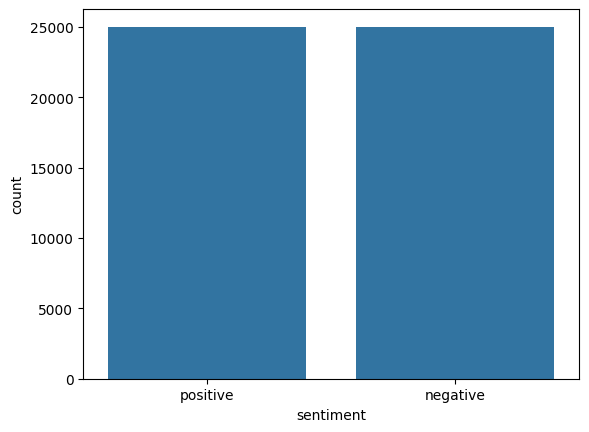

In [9]:

sns.countplot(x="sentiment",data=df)
plt.show()

In [10]:
from collections import Counter
import re

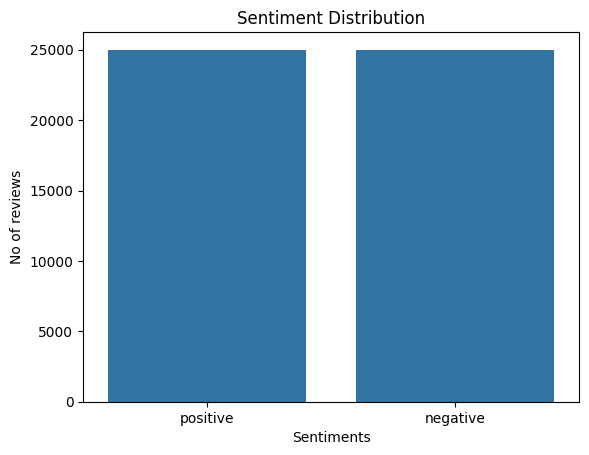

In [11]:
plt.Figure(figsize=(6,4))
sentiment_counts = df["sentiment"].value_counts()
sns.barplot(x=sentiment_counts.index,
            y=sentiment_counts.values)
plt.title("Sentiment Distribution")
plt.ylabel("No of reviews")
plt.xlabel("Sentiments")
plt.show()

In [12]:
df['review_length'] = df['review'].apply(len)
df['review_length'].describe()

count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: review_length, dtype: float64

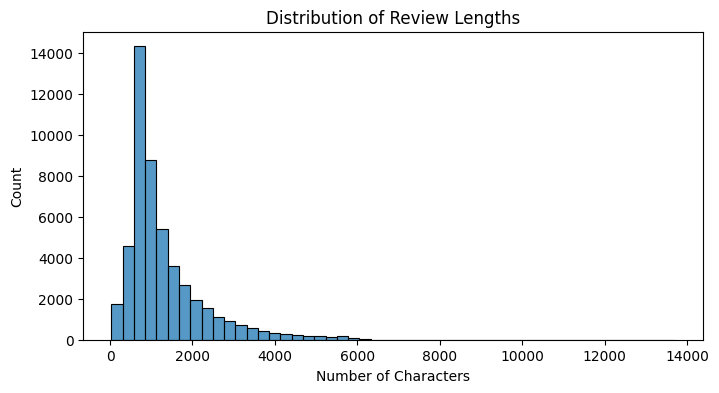

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(df["review_length"], bins=50)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Characters")
plt.show()

In [14]:
df['word_count'] = df['review'].apply(lambda x:len(x.split()))
df['word_count'].describe()

count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: word_count, dtype: float64

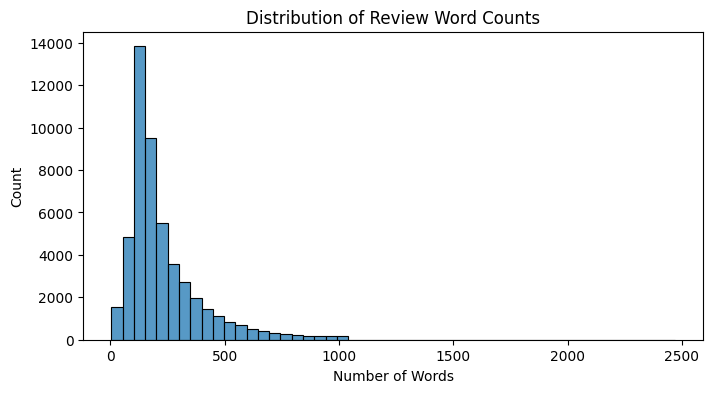

In [15]:
plt.figure(figsize=(8,4))
sns.histplot(df["word_count"], bins=50)
plt.title("Distribution of Review Word Counts")
plt.xlabel("Number of Words")
plt.show()

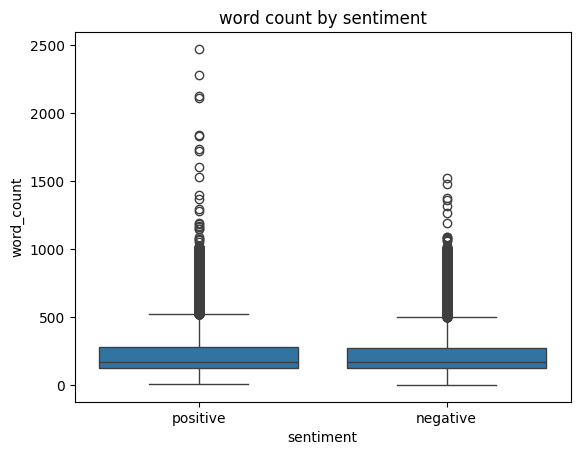

In [16]:
plt.Figure(figsize=(6,4))
sns.boxplot(
    x="sentiment",
    y='word_count',
    data=df
)
plt.title("word count by sentiment")
plt.show()

In [30]:
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

stop_words = set(stopwords.words("english"))


[nltk_data] Downloading package stopwords to /home/ankit-
[nltk_data]     gaur/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [31]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)      # remove HTML tags
    text = re.sub(r"[^a-zA-Z]", " ", text) # keep only letters
    words = text.split()
    
    # ❗ remove stopwords
    words = [word for word in words if word not in stop_words]
    
    return words   # return list of words (better for EDA)



In [32]:
df['clean_text'] = df['review'].apply(clean_text)

In [33]:
df.head()

,review,sentiment,review_length,word_count,clean_text
0,One of the other reviewers has mentioned that ...,positive,1761,307,"[one, reviewers, mentioned, watching, oz, epis..."
1,A wonderful little production. <br /><br />The...,positive,998,162,"[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,926,166,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,748,138,"[basically, family, little, boy, jake, thinks,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230,"[petter, mattei, love, time, money, visually, ..."


In [35]:
from collections import Counter

all_words = []
for words in df["clean_text"]:
    all_words.extend(words)

common_words = Counter(all_words).most_common(20)
common_words


[('movie', 87937),
 ('film', 79676),
 ('one', 53585),
 ('like', 40160),
 ('good', 29737),
 ('time', 25099),
 ('even', 24856),
 ('would', 24599),
 ('story', 23110),
 ('really', 23090),
 ('see', 23021),
 ('well', 21260),
 ('much', 19316),
 ('bad', 18461),
 ('get', 18415),
 ('people', 18182),
 ('great', 18137),
 ('also', 17972),
 ('first', 17576),
 ('made', 16150)]

In [41]:
common_words_df = pd.DataFrame(common_words, columns=["Word", "Frequency"])
common_words_df

,Word,Frequency
0,movie,87937
1,film,79676
2,one,53585
3,like,40160
4,good,29737
5,time,25099
6,even,24856
7,would,24599
8,story,23110
9,really,23090


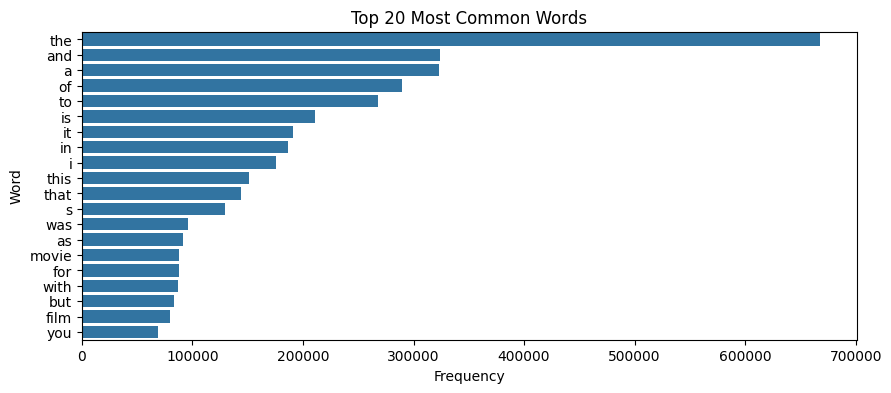

In [25]:
plt.figure(figsize=(10,4))
sns.barplot(x="Frequency", y="Word", data=common_words_df)
plt.title("Top 20 Most Common Words")
plt.show()


In [37]:
pos_words = []
for words in df[df["sentiment"] == "positive"]["clean_text"]:
    pos_words.extend(words)

Counter(pos_words).most_common(15)


[('film', 42095),
 ('movie', 37846),
 ('one', 27312),
 ('like', 17709),
 ('good', 15020),
 ('great', 12961),
 ('story', 12932),
 ('time', 12746),
 ('well', 12724),
 ('see', 12271),
 ('also', 10792),
 ('really', 10736),
 ('would', 10594),
 ('even', 9613),
 ('first', 9228)]

In [39]:
neg_words = []
for words in df[df["sentiment"] == "negative"]["clean_text"]:
    neg_words.extend(words)

Counter(neg_words).most_common(15)



[('movie', 50091),
 ('film', 37581),
 ('one', 26273),
 ('like', 22451),
 ('even', 15243),
 ('good', 14717),
 ('bad', 14714),
 ('would', 14005),
 ('really', 12354),
 ('time', 12353),
 ('see', 10750),
 ('story', 10178),
 ('get', 10129),
 ('much', 10115),
 ('people', 9466)]